## SETUP

In [575]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [576]:
#remova o comentario para criar o diretorio para salvar os dados
#!mkdir data

In [577]:
# Baixando os dados no diretóio:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output data/database
data_path = 'data\database'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 13.5M    0 31868    0     0  74341      0  0:03:10 --:--:--  0:03:10 74457
 59 13.5M   59 8242k    0     0  5785k      0  0:00:02  0:00:01  0:00:01 5788k
100 13.5M  100 13.5M    0     0  6285k      0  0:00:02  0:00:02 --:--:-- 6288k


### Create Function

In [578]:
def visualize_data(data):
    
    ibm_pltt = ['#0F62FE', '#FF7F0E', '#5B5B5B', '#FCC700', '#26A151', '#E71D32', '#F58518', '#9CCEC2', '#C7B7BB']#definindo paleta de cores

    # Visualizar a distribuição da variável alvo 'RainTomorrow'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='RainTomorrow', data=data)
    plt.xlabel('Choveu Amanhã?')
    plt.ylabel('Contagem')
    plt.show()

    # Visualizar a distribuição da variável 'RainToday'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='RainToday', data=data)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return

#função para carregar dados
def load_data():
    raw_data = pd.read_csv(data_path)
    return raw_data

#função para checar valores faltantes nos dados
def check_missing_values(data):
    
    missing_values = data.isnull().sum()# Verificar os valores ausentes em cada coluna

    missing_percentage = (missing_values / len(data)) * 100# Calcular a porcentagem de valores ausentes em relação ao total de linhas

    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})# Criar um DataFrame para visualização dos resultados

    return missing_data

#função para realizar pre processamento dos dados
def pre_processing(raw_data):
    processed_data = raw_data.copy()

    processed_data = processed_data.dropna(subset=['RainTomorrow'])# Drop na coluna 'RainTomorrow' caso haja algum valor ausente na futura variável target

    processed_data['Date'] = pd.to_datetime(processed_data['Date'])# Converter a coluna 'Date' para o tipo datetime

    processed_data['Year'] = processed_data['Date'].dt.year
    processed_data['Month'] = processed_data['Date'].dt.month# Extrair informações relevantes da data e incluí-las como novas colunas
    processed_data['Day'] = processed_data['Date'].dt.day

    processed_data = processed_data.drop(columns=['Date'])  # Descartar a coluna 'Date', após criar 3 colunas para a data dividida removerei a coluna data ja que o modelo nao a comporta

    categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']# Converter as colunas categóricas para o tipo de dado 'category'
    for col in categorical_columns:
        processed_data[col] = processed_data[col].astype('category')

    processed_data['RainTomorrow'] = processed_data['RainTomorrow'].map({'Yes': 1, 'No': 0})  # Substituir 'Yes' por 1 e 'No' por 0 na coluna 'RainTomorrow'

    processed_data['RainToday'] = processed_data['RainToday'].map({'Yes': 1, 'No': 0})# Substituir 'Yes' por 1 e 'No' por 0 na coluna 'RainToday'

    processed_data = pd.get_dummies(processed_data, drop_first=True)# Criar variáveis dummy (one-hot encoding) para as colunas categóricas

    numeric_columns = processed_data.select_dtypes(include=[np.number]).columns   # Preencher os valores "NaN" nas colunas numéricas com o valor médio da coluna
    for col in numeric_columns:
        mean_value = processed_data[col].mean()
        processed_data[col].fillna(mean_value, inplace=True)

    processed_data['MinTemp'] = processed_data['MinTemp'].astype(int)#convertendo dtype
    processed_data['MaxTemp'] = processed_data['MaxTemp'].astype(int)
    processed_data['Rainfall'] = processed_data['Rainfall'].astype(int)
    processed_data['Evaporation'] = processed_data['Evaporation'].astype(int)
    processed_data['Sunshine'] = processed_data['Sunshine'].astype(int)
    processed_data['WindGustSpeed'] = processed_data['WindGustSpeed'].astype(int)
    processed_data['WindSpeed9am'] = processed_data['WindSpeed9am'].astype(int)
    processed_data['WindSpeed3pm'] = processed_data['WindSpeed3pm'].astype(int)
    processed_data['Humidity9am'] = processed_data['Humidity9am'].astype(int)
    processed_data['Humidity3pm'] = processed_data['Humidity3pm'].astype(int)
    processed_data['Pressure9am'] = processed_data['Pressure9am'].astype(int)
    processed_data['Pressure3pm'] = processed_data['Pressure3pm'].astype(int)
    processed_data['Cloud9am'] = processed_data['Cloud9am'].astype(int)
    processed_data['Cloud3pm'] = processed_data['Cloud3pm'].astype(int)
    processed_data['Temp9am'] = processed_data['Temp9am'].astype(int)
    processed_data['Temp3pm'] = processed_data['Temp3pm'].astype(int)
    processed_data['RISK_MM'] = processed_data['RISK_MM'].astype(int)
    
    return processed_data

#função para dividir dados de treino e validação
def split_data(data: pd.DataFrame, val_size=0.2):
    features = data.drop(columns=['RainTomorrow'])
    target = data['RainTomorrow']

    random_state = 42
    # Dividir os dados em treino e validação
    x_train, x_val, y_train, y_val = train_test_split(
        features,  # Usar features em vez de df
        target,    # Usar target em vez de df
        test_size=0.2,
        random_state=42
    )

    return x_train, x_val, y_train, y_val

#função para a contrução do modelo
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


In [579]:
# Carregar os dados
df = load_data()

#observar tamanho antes do tratamento
df.shape

(142193, 24)

## EDA

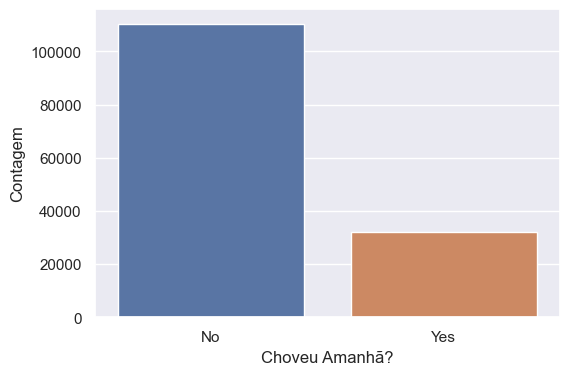

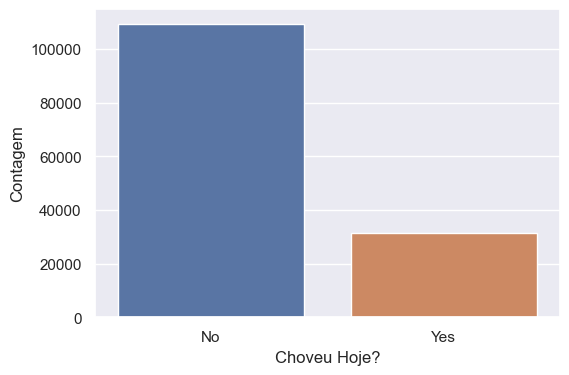

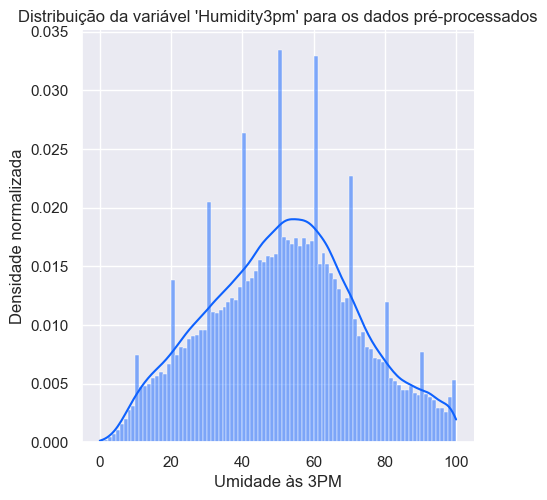

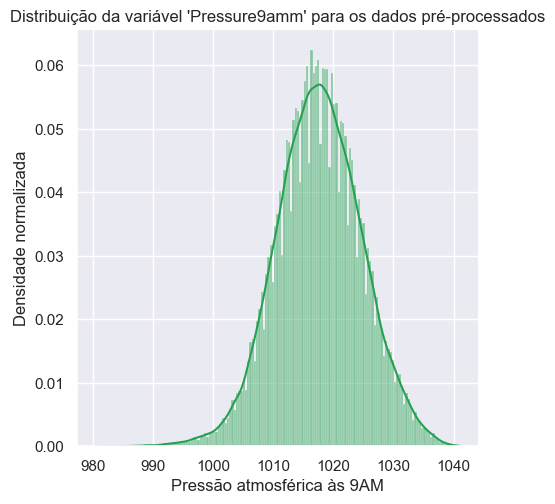

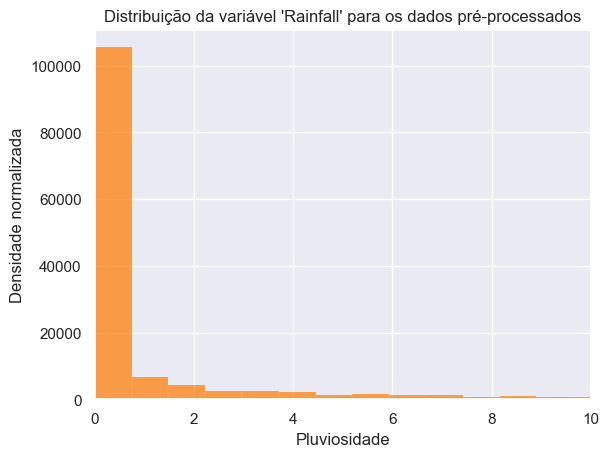

In [580]:
# Visualizar as distribuições das features
visualize_data(df)

## Data Pre-processing

In [581]:
#função de tratamento
df = pre_processing(df)

In [582]:
#somente para verificarmos a quantidade de colunas apos o OneHotEncoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 115 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(1), int32(17), int64(4), uint8(93)
memory usage: 27.3 MB


In [583]:
check_missing_values(df)


,Missing Values,Missing Percentage
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
...,...,...
WindDir3pm_SSW,0,0.0
WindDir3pm_SW,0,0.0
WindDir3pm_W,0,0.0
WindDir3pm_WNW,0,0.0


## Modeling

In [584]:
# Dividir os dados em conjuntos de treinamento e validação
x_train, x_val, y_train, y_val = split_data(df)

In [585]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13,22,0,5,7,44,20,24,71,22,...,0,0,0,0,0,0,0,0,1,0
1,7,25,0,5,7,44,4,22,44,25,...,0,0,0,0,0,0,0,0,0,1
2,12,25,0,5,7,46,19,26,38,30,...,0,0,0,0,0,0,0,0,0,1
3,9,28,0,5,7,24,11,9,45,16,...,0,0,0,0,0,0,0,0,0,0
4,17,32,1,5,7,41,7,20,82,33,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3,21,0,5,7,31,15,13,59,27,...,0,0,0,0,0,0,0,0,0,0
142189,2,23,0,5,7,31,13,11,51,24,...,0,0,0,0,0,0,0,0,0,0
142190,3,25,0,5,7,22,13,9,56,21,...,0,0,0,0,0,0,0,0,0,0
142191,5,26,0,5,7,37,9,9,53,24,...,0,0,0,0,0,0,0,0,1,0


In [586]:
x_val=np.asarray(x_val)

y_val=np.asarray(y_val)

In [587]:
#Treinar o modelo
model = build_model(input_shape=(x_train.shape[1],))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_val, y_val))

In [588]:
#Avaliar o desempenho do modelo
y_pred_prob = model.predict(x_val)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
print('\n')
print(f"Acurácia:  {accuracy}\n")
print("Matriz de Confusão:\n\n", conf_matrix)
print("Relatório de Classificação:\n\n", report)


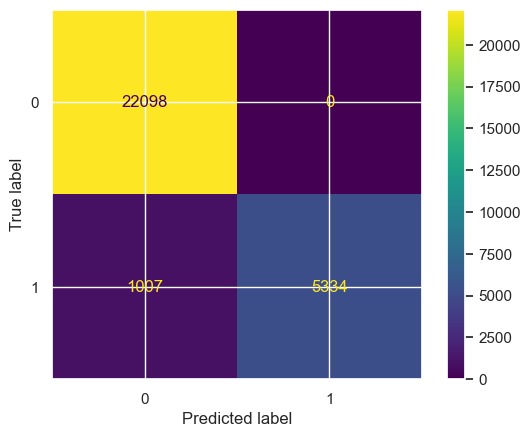

In [590]:
display.plot()